In [1]:
import hgfp
import torch
import dgl

In [2]:
element_to_idx = {b'BR': 0, b'C': 1, b'C2': 2, b'CA': 3, b'CB': 4, b'CC': 5, b'CJ': 6, b'CL': 7, b'CM': 8, b'CP': 9, b'CR': 10, b'CT': 11, b'CW': 12, b'Cstar': 13, b'F': 14, b'H': 15, b'H1': 16, b'H2': 17, b'H3': 18, b'H4': 19, b'H5': 20, b'HA': 21, b'HC': 22, b'HO': 23, b'HP': 24, b'HX': 25, b'I': 26, b'N': 27, b'N2': 28, b'N3': 29, b'NA': 30, b'NB': 31, b'NC': 32, b'NL': 33, b'Nstar': 34, b'Nu': 35, b'O': 36, b'O2': 37, b'OH': 38, b'OS': 39, b'Ou': 40, b'P': 41, b'S': 42, b'SO': 43, b'Su': 44}

In [3]:
idx_to_element = {v: k.decode("utf-8") for k, v in element_to_idx.items()}

In [4]:
ds = list(hgfp.data.parm_at_Frosst.df.batched(num=100, batch_size=16))

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


In [5]:
print(len(ds))

6


In [6]:
ds_tr, ds_vl, ds_te = hgfp.data.utils.split(ds, 1, 1)

In [7]:
class Classifier(torch.nn.Module):
    def __init__(self, in_dim=117, out_dim=256, n_classes=45):
        super(Classifier, self).__init__()
        self.d = torch.nn.Linear(in_dim, out_dim)
        self.c = torch.nn.Linear(out_dim, n_classes)
        
    def forward(self, g):
        h_v = g.nodes['atom'].data['h0']
        y_hat = self.c(
                torch.nn.functional.sigmoid(
                    self.d(
                        h_v)))
        
        return y_hat
        

In [8]:
net = hgfp.models.gcn_with_combine_readout.Net([128, 'tanh', 128, 'tanh', 128])
# net = Net()
# net = BaseLine()
classifier = Classifier()

In [9]:
print(net.exes)

['d0', 'a1', 'd2', 'a3', 'd4']


In [10]:
# opt = torch.optim.Adam(list(net.parameters()) + list(classifier.parameters()), 1e-3)
opt = torch.optim.Adam(list(classifier.parameters()), 1e-3)

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()

In [12]:
for _ in range(500):
    for g, y in ds_tr:
        opt.zero_grad()
        # y_hat = classifier(net(g, return_graph=True))
        y_hat = classifier(g)
        loss = loss_fn(y_hat, torch.where(torch.gt(y, 0))[1])
        print(loss)
        loss.backward()
        opt.step()

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(3.8607, grad_fn=<NllLossBackward>)
tensor(3.7202, grad_fn=<NllLossBackward>)
tensor(3.6277, grad_fn=<NllLossBackward>)
tensor(3.4477, grad_fn=<NllLossBackward>)
tensor(3.3532, grad_fn=<NllLossBackward>)
tensor(3.2531, grad_fn=<NllLossBackward>)
tensor(3.2298, grad_fn=<NllLossBackward>)
tensor(3.0460, grad_fn=<NllLossBackward>)
tensor(3.0108, grad_fn=<NllLossBackward>)
tensor(2.9564, grad_fn=<NllLossBackward>)
tensor(2.9949, grad_fn=<NllLossBackward>)
tensor(2.8102, grad_fn=<NllLossBackward>)
tensor(2.8158, grad_fn=<NllLossBackward>)
tensor(2.8063, grad_fn=<NllLossBackward>)
tensor(2.8817, grad_fn=<NllLossBackward>)
tensor(2.7007, grad_fn=<NllLossBackward>)
tensor(2.7229, grad_fn=<NllLossBackward>)
tensor(2.7373, grad_fn=<NllLossBackward>)
tensor(2.8245, grad_fn=<NllLossBackward>)
tensor(2.6498, grad_fn=<NllLossBackward>)
tensor(2.6736, grad_fn=<NllLossBackward>)
tensor(2.6881, grad_fn=<NllLossBackward>)
tensor(2.7744, grad_fn=<NllLossBackward>)
tensor(2.6078, grad_fn=<NllLossBac

tensor(1.4835, grad_fn=<NllLossBackward>)
tensor(1.5047, grad_fn=<NllLossBackward>)
tensor(1.5184, grad_fn=<NllLossBackward>)
tensor(1.4800, grad_fn=<NllLossBackward>)
tensor(1.4735, grad_fn=<NllLossBackward>)
tensor(1.4949, grad_fn=<NllLossBackward>)
tensor(1.5071, grad_fn=<NllLossBackward>)
tensor(1.4707, grad_fn=<NllLossBackward>)
tensor(1.4638, grad_fn=<NllLossBackward>)
tensor(1.4853, grad_fn=<NllLossBackward>)
tensor(1.4961, grad_fn=<NllLossBackward>)
tensor(1.4616, grad_fn=<NllLossBackward>)
tensor(1.4543, grad_fn=<NllLossBackward>)
tensor(1.4759, grad_fn=<NllLossBackward>)
tensor(1.4853, grad_fn=<NllLossBackward>)
tensor(1.4527, grad_fn=<NllLossBackward>)
tensor(1.4450, grad_fn=<NllLossBackward>)
tensor(1.4668, grad_fn=<NllLossBackward>)
tensor(1.4747, grad_fn=<NllLossBackward>)
tensor(1.4439, grad_fn=<NllLossBackward>)
tensor(1.4359, grad_fn=<NllLossBackward>)
tensor(1.4578, grad_fn=<NllLossBackward>)
tensor(1.4644, grad_fn=<NllLossBackward>)
tensor(1.4354, grad_fn=<NllLossBac

tensor(1.1400, grad_fn=<NllLossBackward>)
tensor(1.1585, grad_fn=<NllLossBackward>)
tensor(1.1177, grad_fn=<NllLossBackward>)
tensor(1.1417, grad_fn=<NllLossBackward>)
tensor(1.1374, grad_fn=<NllLossBackward>)
tensor(1.1557, grad_fn=<NllLossBackward>)
tensor(1.1145, grad_fn=<NllLossBackward>)
tensor(1.1388, grad_fn=<NllLossBackward>)
tensor(1.1348, grad_fn=<NllLossBackward>)
tensor(1.1529, grad_fn=<NllLossBackward>)
tensor(1.1113, grad_fn=<NllLossBackward>)
tensor(1.1359, grad_fn=<NllLossBackward>)
tensor(1.1322, grad_fn=<NllLossBackward>)
tensor(1.1502, grad_fn=<NllLossBackward>)
tensor(1.1081, grad_fn=<NllLossBackward>)
tensor(1.1331, grad_fn=<NllLossBackward>)
tensor(1.1297, grad_fn=<NllLossBackward>)
tensor(1.1476, grad_fn=<NllLossBackward>)
tensor(1.1050, grad_fn=<NllLossBackward>)
tensor(1.1303, grad_fn=<NllLossBackward>)
tensor(1.1273, grad_fn=<NllLossBackward>)
tensor(1.1449, grad_fn=<NllLossBackward>)
tensor(1.1020, grad_fn=<NllLossBackward>)
tensor(1.1275, grad_fn=<NllLossBac

tensor(1.0395, grad_fn=<NllLossBackward>)
tensor(1.0453, grad_fn=<NllLossBackward>)
tensor(0.9861, grad_fn=<NllLossBackward>)
tensor(1.0195, grad_fn=<NllLossBackward>)
tensor(1.0384, grad_fn=<NllLossBackward>)
tensor(1.0440, grad_fn=<NllLossBackward>)
tensor(0.9847, grad_fn=<NllLossBackward>)
tensor(1.0181, grad_fn=<NllLossBackward>)
tensor(1.0374, grad_fn=<NllLossBackward>)
tensor(1.0427, grad_fn=<NllLossBackward>)
tensor(0.9832, grad_fn=<NllLossBackward>)
tensor(1.0167, grad_fn=<NllLossBackward>)
tensor(1.0364, grad_fn=<NllLossBackward>)
tensor(1.0415, grad_fn=<NllLossBackward>)
tensor(0.9818, grad_fn=<NllLossBackward>)
tensor(1.0154, grad_fn=<NllLossBackward>)
tensor(1.0354, grad_fn=<NllLossBackward>)
tensor(1.0402, grad_fn=<NllLossBackward>)
tensor(0.9804, grad_fn=<NllLossBackward>)
tensor(1.0140, grad_fn=<NllLossBackward>)
tensor(1.0344, grad_fn=<NllLossBackward>)
tensor(1.0390, grad_fn=<NllLossBackward>)
tensor(0.9790, grad_fn=<NllLossBackward>)
tensor(1.0127, grad_fn=<NllLossBac

tensor(0.9962, grad_fn=<NllLossBackward>)
tensor(0.9317, grad_fn=<NllLossBackward>)
tensor(0.9661, grad_fn=<NllLossBackward>)
tensor(1.0002, grad_fn=<NllLossBackward>)
tensor(0.9954, grad_fn=<NllLossBackward>)
tensor(0.9309, grad_fn=<NllLossBackward>)
tensor(0.9653, grad_fn=<NllLossBackward>)
tensor(0.9996, grad_fn=<NllLossBackward>)
tensor(0.9947, grad_fn=<NllLossBackward>)
tensor(0.9300, grad_fn=<NllLossBackward>)
tensor(0.9645, grad_fn=<NllLossBackward>)
tensor(0.9991, grad_fn=<NllLossBackward>)
tensor(0.9940, grad_fn=<NllLossBackward>)
tensor(0.9292, grad_fn=<NllLossBackward>)
tensor(0.9636, grad_fn=<NllLossBackward>)
tensor(0.9985, grad_fn=<NllLossBackward>)
tensor(0.9933, grad_fn=<NllLossBackward>)
tensor(0.9284, grad_fn=<NllLossBackward>)
tensor(0.9629, grad_fn=<NllLossBackward>)
tensor(0.9980, grad_fn=<NllLossBackward>)
tensor(0.9925, grad_fn=<NllLossBackward>)
tensor(0.9276, grad_fn=<NllLossBackward>)
tensor(0.9621, grad_fn=<NllLossBackward>)
tensor(0.9974, grad_fn=<NllLossBac

tensor(0.8991, grad_fn=<NllLossBackward>)
tensor(0.9345, grad_fn=<NllLossBackward>)
tensor(0.9783, grad_fn=<NllLossBackward>)
tensor(0.9672, grad_fn=<NllLossBackward>)
tensor(0.8986, grad_fn=<NllLossBackward>)
tensor(0.9340, grad_fn=<NllLossBackward>)
tensor(0.9780, grad_fn=<NllLossBackward>)
tensor(0.9668, grad_fn=<NllLossBackward>)
tensor(0.8981, grad_fn=<NllLossBackward>)
tensor(0.9336, grad_fn=<NllLossBackward>)
tensor(0.9777, grad_fn=<NllLossBackward>)
tensor(0.9664, grad_fn=<NllLossBackward>)
tensor(0.8977, grad_fn=<NllLossBackward>)
tensor(0.9331, grad_fn=<NllLossBackward>)
tensor(0.9774, grad_fn=<NllLossBackward>)
tensor(0.9660, grad_fn=<NllLossBackward>)
tensor(0.8972, grad_fn=<NllLossBackward>)
tensor(0.9327, grad_fn=<NllLossBackward>)
tensor(0.9771, grad_fn=<NllLossBackward>)
tensor(0.9656, grad_fn=<NllLossBackward>)
tensor(0.8967, grad_fn=<NllLossBackward>)
tensor(0.9323, grad_fn=<NllLossBackward>)
tensor(0.9768, grad_fn=<NllLossBackward>)
tensor(0.9653, grad_fn=<NllLossBac

tensor(0.9179, grad_fn=<NllLossBackward>)
tensor(0.9665, grad_fn=<NllLossBackward>)
tensor(0.9522, grad_fn=<NllLossBackward>)
tensor(0.8803, grad_fn=<NllLossBackward>)
tensor(0.9177, grad_fn=<NllLossBackward>)
tensor(0.9663, grad_fn=<NllLossBackward>)
tensor(0.9520, grad_fn=<NllLossBackward>)
tensor(0.8800, grad_fn=<NllLossBackward>)
tensor(0.9175, grad_fn=<NllLossBackward>)
tensor(0.9661, grad_fn=<NllLossBackward>)
tensor(0.9518, grad_fn=<NllLossBackward>)
tensor(0.8797, grad_fn=<NllLossBackward>)
tensor(0.9172, grad_fn=<NllLossBackward>)
tensor(0.9660, grad_fn=<NllLossBackward>)
tensor(0.9515, grad_fn=<NllLossBackward>)
tensor(0.8795, grad_fn=<NllLossBackward>)
tensor(0.9170, grad_fn=<NllLossBackward>)
tensor(0.9658, grad_fn=<NllLossBackward>)
tensor(0.9513, grad_fn=<NllLossBackward>)
tensor(0.8792, grad_fn=<NllLossBackward>)
tensor(0.9167, grad_fn=<NllLossBackward>)
tensor(0.9656, grad_fn=<NllLossBackward>)
tensor(0.9511, grad_fn=<NllLossBackward>)
tensor(0.8789, grad_fn=<NllLossBac

tensor(0.9069, grad_fn=<NllLossBackward>)
tensor(0.9580, grad_fn=<NllLossBackward>)
tensor(0.9418, grad_fn=<NllLossBackward>)
tensor(0.8671, grad_fn=<NllLossBackward>)
tensor(0.9068, grad_fn=<NllLossBackward>)
tensor(0.9579, grad_fn=<NllLossBackward>)
tensor(0.9417, grad_fn=<NllLossBackward>)
tensor(0.8669, grad_fn=<NllLossBackward>)
tensor(0.9067, grad_fn=<NllLossBackward>)
tensor(0.9578, grad_fn=<NllLossBackward>)
tensor(0.9416, grad_fn=<NllLossBackward>)
tensor(0.8667, grad_fn=<NllLossBackward>)
tensor(0.9065, grad_fn=<NllLossBackward>)
tensor(0.9577, grad_fn=<NllLossBackward>)
tensor(0.9415, grad_fn=<NllLossBackward>)
tensor(0.8666, grad_fn=<NllLossBackward>)
tensor(0.9064, grad_fn=<NllLossBackward>)
tensor(0.9576, grad_fn=<NllLossBackward>)
tensor(0.9413, grad_fn=<NllLossBackward>)
tensor(0.8664, grad_fn=<NllLossBackward>)
tensor(0.9063, grad_fn=<NllLossBackward>)
tensor(0.9575, grad_fn=<NllLossBackward>)
tensor(0.9412, grad_fn=<NllLossBackward>)
tensor(0.8662, grad_fn=<NllLossBac

tensor(0.9354, grad_fn=<NllLossBackward>)
tensor(0.8589, grad_fn=<NllLossBackward>)
tensor(0.9004, grad_fn=<NllLossBackward>)
tensor(0.9526, grad_fn=<NllLossBackward>)
tensor(0.9354, grad_fn=<NllLossBackward>)
tensor(0.8588, grad_fn=<NllLossBackward>)
tensor(0.9003, grad_fn=<NllLossBackward>)
tensor(0.9526, grad_fn=<NllLossBackward>)
tensor(0.9353, grad_fn=<NllLossBackward>)
tensor(0.8587, grad_fn=<NllLossBackward>)
tensor(0.9003, grad_fn=<NllLossBackward>)
tensor(0.9525, grad_fn=<NllLossBackward>)
tensor(0.9352, grad_fn=<NllLossBackward>)
tensor(0.8586, grad_fn=<NllLossBackward>)
tensor(0.9002, grad_fn=<NllLossBackward>)
tensor(0.9524, grad_fn=<NllLossBackward>)
tensor(0.9351, grad_fn=<NllLossBackward>)
tensor(0.8585, grad_fn=<NllLossBackward>)
tensor(0.9001, grad_fn=<NllLossBackward>)
tensor(0.9524, grad_fn=<NllLossBackward>)
tensor(0.9350, grad_fn=<NllLossBackward>)
tensor(0.8584, grad_fn=<NllLossBackward>)
tensor(0.9000, grad_fn=<NllLossBackward>)
tensor(0.9523, grad_fn=<NllLossBac

In [13]:
net.eval()
from sklearn.metrics import confusion_matrix
for g, y in ds_tr:
    y_hat = torch.argmax(classifier(net(g, return_graph=True)), dim=1)
    y = torch.argmax(y, dim=1)
    

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [14]:
import pandas as pd
df_cm = pd.DataFrame(confusion_matrix(y, y_hat, labels=list(range(1, 46))),
    [v for k, v in idx_to_element.items()],
    [v for k, v in idx_to_element.items()])

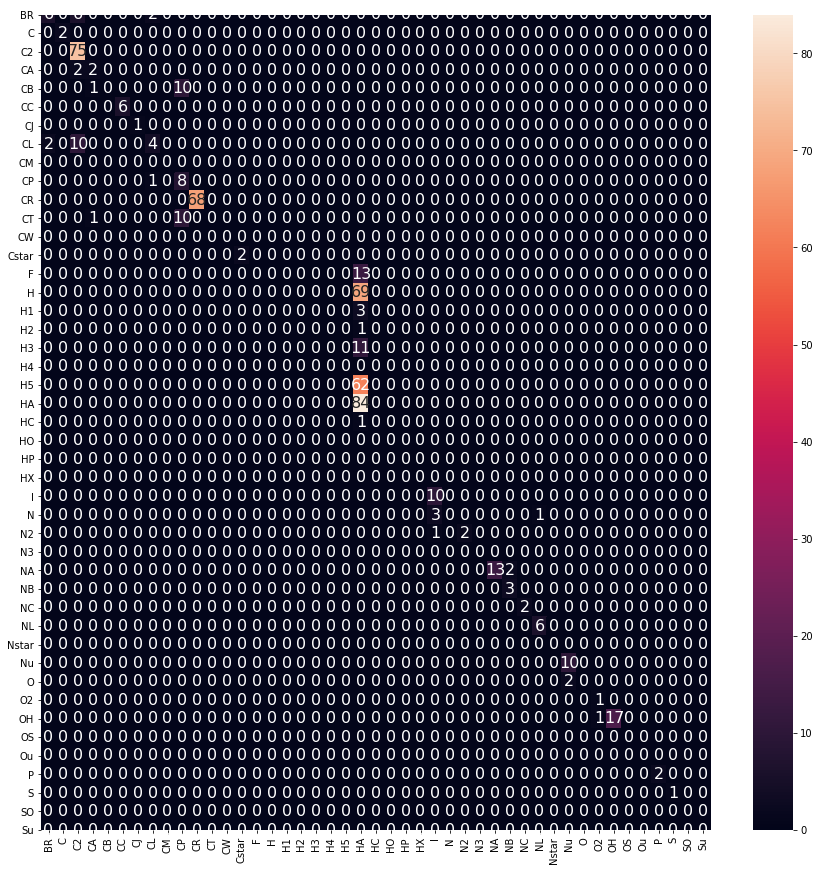

In [16]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()